In [1]:
import numpy as np
import torch
import numpy
import laspy
import open3d as o3d
import utils.utils as utils
import os
import torchvision

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu121
0.16.0+cu121


In [5]:
source_data_path  = "/home/omar/TUM/data_MA/m1695833/Sim2RealDistributionAlignedDataset/sim/data/pcl/"
#source_data_path  = "/home/omar/TUM/Masterarbeit/Data/m1695833/Sim2RealDistributionAlignedDataset/sim/data/pcl/"
#source_label_path = "/home/omar/TUM/Masterarbeit/Data/m1695833/Sim2RealDistributionAlignedDataset/sim/data/label/"

source_label_path = "/home/omar/TUM/data_MA/m1695833/Sim2RealDistributionAlignedDataset/sim/data/label/"
#save_data_path    = "/home/omar/TUM/Masterarbeit/Data/combined/sim/"
save_data_path    = "/home/omar/TUM/Data/cropped/sim/"

file_list=[]
for filename_label in os.listdir(source_label_path):
        file_list.append(filename_label)
        text_file     = open(source_label_path+filename_label,"r")
        label_data    = text_file.read().split()
        pcd_file      = filename_label.replace('.txt',".pcd") #replace the endings
        pcd_file_path = source_data_path+pcd_file
        #print(pcd_file_path)
        try:
            print(f"Processing file: {pcd_file}")

            pcd = o3d.io.read_point_cloud(pcd_file_path)
            utils.crop_bbox(pcd, label_data, os.path.join(save_data_path, pcd_file))
        except Exception as e:
            print(f"Error occurred while processing file: {pcd_file}, Error: {e}")
            #print(filename_label)

Processing file: 013620.pcd
Processing file: 001180.pcd
Processing file: 020405.pcd
Processing file: 029970.pcd
Processing file: 002200.pcd
Processing file: 005580.pcd
Processing file: 015595.pcd
Processing file: 007760.pcd
Processing file: 012340.pcd
Processing file: 027325.pcd
Processing file: 017825.pcd
Processing file: 005620.pcd
Processing file: 018365.pcd
Processing file: 011775.pcd
Processing file: 018475.pcd
Processing file: 009515.pcd
Processing file: 013210.pcd
Processing file: 029430.pcd
Processing file: 018340.pcd
Processing file: 008005.pcd
Processing file: 011790.pcd
Processing file: 015965.pcd
Processing file: 005840.pcd
Processing file: 028215.pcd
Processing file: 004215.pcd
Processing file: 004340.pcd
Processing file: 021405.pcd
Processing file: 026885.pcd
Processing file: 006300.pcd
Processing file: 003550.pcd
Processing file: 024785.pcd
Processing file: 014600.pcd
Processing file: 023320.pcd
Processing file: 010570.pcd
Processing file: 027705.pcd
Processing file: 022

In [4]:
box=["Car" ,0.0 ,0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0, 1.18, 1.9, 4.88, 40.69 ,5.82, 1.31 ,0.2]
print(box[0])

Car


In [2]:
bbox="Car 0.0 0 0.0 0.0 0.0 0.0 0.0 1.18 1.9 4.88 -81.45 8.32 4.06 -0.36"
name=bbox.strip().split()
print(name)

del name[1:8]
name.append(name.pop(0))
print(name)
dx,dy,dz= name[0:3]
print(dx,dy,dz)
temp=dx
dx=dz
dz=temp
print(dx,dy,dz)
x,y,z=name[3:6]
print(x,y,z)
t=x
x=z
z=t
print(x,y,z)

name[3:6]=dx,dy,dz
#


name[0:3]=x,y,z
#print(dx,dy,dz)
print(name)
#print(name[8:])

['Car', '0.0', '0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.18', '1.9', '4.88', '-81.45', '8.32', '4.06', '-0.36']
['1.18', '1.9', '4.88', '-81.45', '8.32', '4.06', '-0.36', 'Car']
1.18 1.9 4.88
4.88 1.9 1.18
-81.45 8.32 4.06
4.06 8.32 -81.45
['4.06', '8.32', '-81.45', '4.88', '1.9', '1.18', '-0.36', 'Car']


In [3]:
print(utils.correct_bbox_label(bbox))

['4.06', '8.32', '-81.45', '4.88', '1.9', '1.18', '-0.36', 'Car']


In [5]:
#pcd=o3d.io.read_point_cloud("/home/omar/TUM/Masterarbeit/Data/combined/sim/000375.pcd")
pcd=o3d.io.read_point_cloud("/home/omar/TUM/Data/cropped/sim/000015.pcd")
print(pcd.points)
#utils.visualize(pcd)

AttributeError: 'open3d.cpu.pybind.utility.Vector3dVector' object has no attribute 'shape'

In [4]:
#cropped_car=o3d.io.read_point_cloud("/home/omar/TUM/Masterarbeit/Data/cropped/sim/024490.pcd")
cropped_car=o3d.io.read_point_cloud("/home/omar/TUM/Masterarbeit/Data/cropped/real/024490.pcd")
utils.visualize(cropped_car)

[Open3D WARNING] Read PCD failed: unable to open file: /home/omar/TUM/Masterarbeit/Data/cropped/real/024490.pcd


In [39]:
#make json file and use it for cropping
crop_json="/home/omar/TUM/Masterarbeit/Codes/cropped_1.json"
vol = o3d.visualization.read_selection_polygon_volume(crop_json)
cropped = vol.crop_point_cloud(real_pcd)
o3d.visualization.draw_geometries([cropped])

In [40]:
utils.visualize(cropped)
print(crop_json)

/home/omar/TUM/Masterarbeit/Codes/cropped_1.json


In [7]:
#vis = o3d.visualization.VisualizerWithEditing()
vis = o3d.visualization.Visualizer()

aligned_bb = o3d.geometry.AxisAlignedBoundingBox(np.array([-29.67,72.05,10.12]), np.array([1.18,1.9,4.88])) 
bb = o3d.geometry.OrientedBoundingBox.create_from_axis_aligned_bounding_box(aligned_bb) 
bb.color = [1, 0, 0] 
vis.create_window()
vis.add_geometry(real_pcd)
vis.add_geometry(bb) 
vis.run()  # user picks points
vis.destroy_window()
picked_points = np.asarray(real_pcd.points)[vis.get_picked_points()]


AttributeError: 'open3d.cuda.pybind.visualization.Visualizer' object has no attribute 'get_picked_points'

In [7]:
print (picked_points)

[]


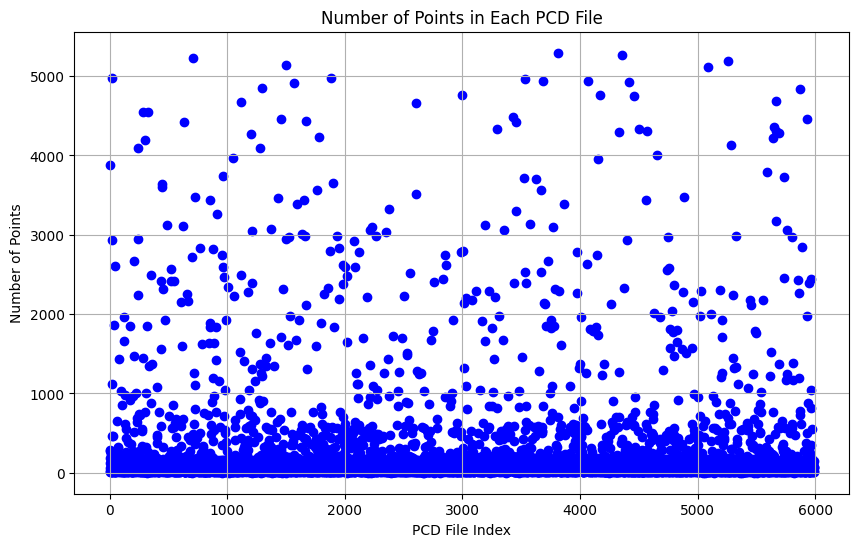

In [3]:
import os
import open3d as o3d
import matplotlib.pyplot as plt

# Folder containing PCD files
folder_path = '/home/omar/TUM/Data/cropped/real'

# List to store number of points in each PCD file
num_points_list = []

# Iterate over each PCD file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.pcd'):
        # Read PCD file
        pcd = o3d.io.read_point_cloud(os.path.join(folder_path, file_name))
        # Get number of points
        num_points = len(pcd.points)
        # Append number of points to list
        num_points_list.append(num_points)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(num_points_list)), num_points_list, color='blue')
plt.title('Number of Points in Each PCD File')
plt.xlabel('PCD File Index')
plt.ylabel('Number of Points')
plt.grid(True)
plt.show()


Number of files with points 0-50: 1896
Number of files with points 50-100: 1699
Number of files with points 100-300: 1629
Number of files with points 300-1000: 442
Number of files with points 1000+: 327


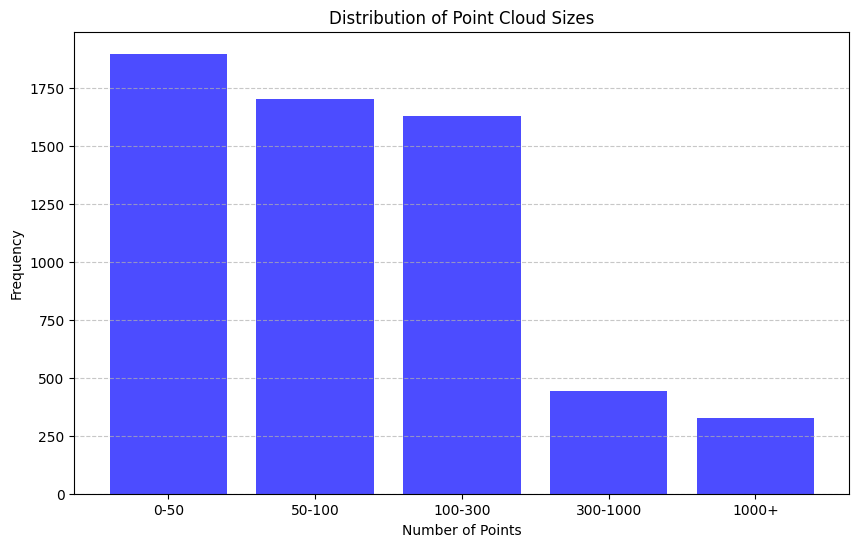

In [10]:
import os
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

# Folder containing PCD files
folder_path = '/home/omar/TUM/Data/cropped/real'

# List to store number of points in each PCD file
num_points_list = []

# Iterate over each PCD file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.pcd'):
        # Read PCD file
        pcd = o3d.io.read_point_cloud(os.path.join(folder_path, file_name))
        # Get number of points
        num_points = len(pcd.points)
        # Append number of points to list
        num_points_list.append(num_points)

# Convert list to numpy array for efficient array operations
num_points_array = np.array(num_points_list)

# Define bins for histogram
bins = [0, 50,100, 300, 1000, np.inf]

# Create histogram
hist, bin_edges = np.histogram(num_points_array, bins=bins)

# Define bin labels
bin_labels = ['0-50','50-100', '100-300', '300-1000', '1000+']
for i, count in enumerate(hist):
    print(f'Number of files with points {bin_labels[i]}: {count}')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bin_labels, hist, color='blue', alpha=0.7)
plt.title('Distribution of Point Cloud Sizes')
plt.xlabel('Number of Points')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
crop_pcd=o3d.io.read_point_cloud("/home/omar/TUM/Masterarbeit/Codes/cropped_1.ply")
utils.visualize(crop_pcd)

In [9]:
data_path="/home/omar/TUM/Masterarbeit/Data/m1695833/Sim2RealDistributionAlignedDataset/real/data/pcl"
real_pcd= o3d.io.read_point_cloud(data_path+"/000000.pcd")
t=[ 1.18 ,1.9, 4.88 ,-29.67, 72.05 ,10.12,-0.12]
gt=translate_boxes_to_open3d_instance(t)
draw_scenes(real_pcd,gt)
print(gt)

TypeError: 'open3d.cuda.pybind.geometry.PointCloud' object is not subscriptable